In [9]:
import os
import sys
sys.path.append("../src")
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from util import *
from model import *
import json

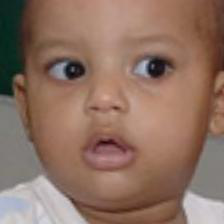

In [26]:
with open("../config/age_parameters.json") as param:
    data = json.load(param)
    image_path = data["load_data"]["train_image_path"]
    resize = data["load_data"]["resize"]

save_path = "../models/age_model_1/cp-0037.ckpt"
img_path = os.path.join(image_path, "19.jpg")
image = Image.open(img_path)
image

In [27]:
model = OutputModel().assemble_full_model(resize, resize)
model.load_weights(save_path)

In [50]:
img_arr = preprocess_image(img_path, resize, resize).reshape(-1, 198, 198, 3)

pred = np.argmax(model.predict(img_arr), axis = 1)[0]

encoding = {
        'age_id': {
            0: '0-2', 
            1: '3-9', 
            2: '10-19', 
            3: '20-29', 
            4: '30-39',
            5: '40-49',
            6: '50-59',
            7: '60-69',
            8: "more than 70"
        }
    }

print("The predicted age of the image above is in the age range of {}".format(encoding["age_id"][pred]))


The predicted age of the image above is in the age range of 0-2
